In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
file_path = './housing.csv'

In [3]:
df = pd.read_csv(file_path)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


dependent variable = median_house_value


In [5]:
types_of_ocean_proximity = df['ocean_proximity'].unique()
print(types_of_ocean_proximity)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


Missing data


In [6]:
missing_values = df.isnull().sum()

missing_values_percentage = (missing_values / len(df))*100

print("missing_values: ", missing_values)
print("missing_values_percentage: ", missing_values_percentage)

missing_values:  longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
missing_values_percentage:  longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


percentage is too low. if percentage is high , u have to go to the data imputation.


In [7]:
df_cleaned = df.dropna()

In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


data exploration and visualization


In [9]:
df_cleaned.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


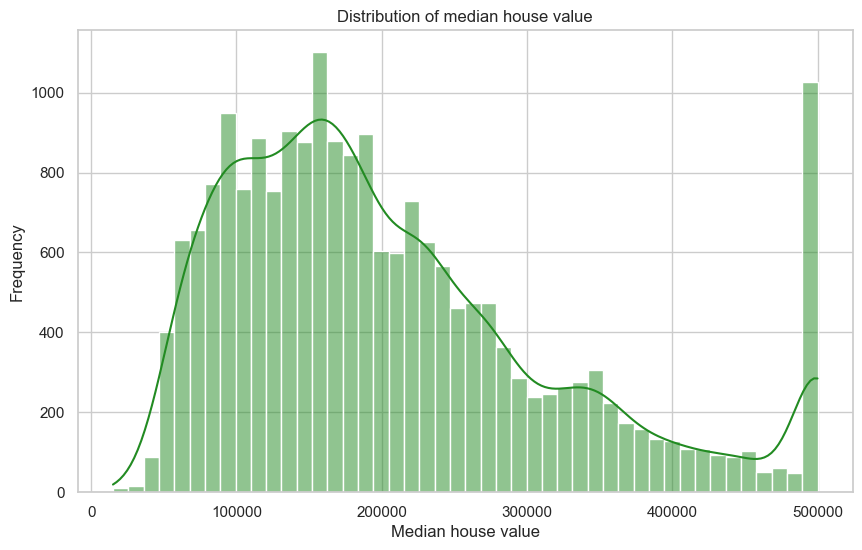

In [10]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['median_house_value'], color='forestgreen', kde=True)
plt.title('Distribution of median house value')
plt.xlabel('Median house value')
plt.ylabel('Frequency')
plt.show()

inter-quantile-range (IQR) for removing outliers


In [ ]:
Q1 = df_cleaned['median_house_value'].quantile(0.25)
Q3 = df_cleaned['median_house_value'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers_1 = df_cleaned[(df_cleaned['median_house_value'] >= lower_bound) & (
    df_cleaned['median_house_value'] <= upper_bound)]
print(df_cleaned.shape)
print(df_no_outliers_1.shape)

(20433, 10)
(19369, 10)


boxplot for indentify outliers , income


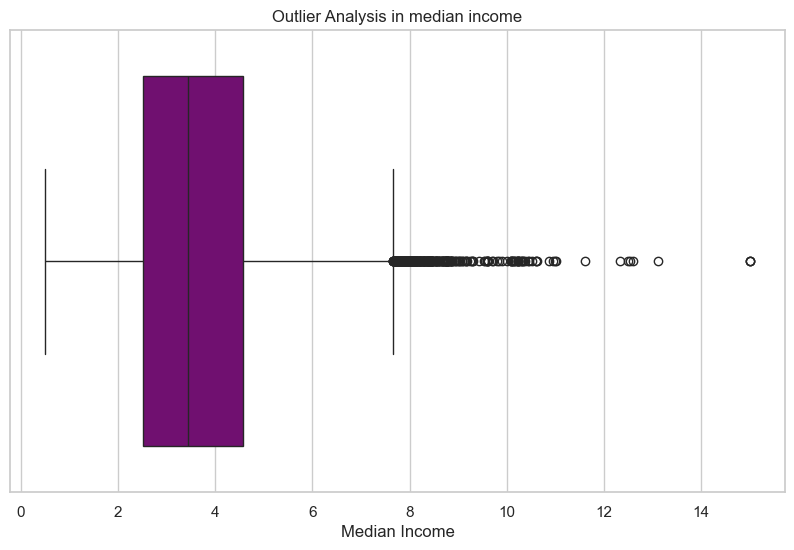

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers_1['median_income'], color='purple')
plt.title('Outlier Analysis in median income')
plt.xlabel('Median Income')
plt.show()

In [13]:
Q1 = df_no_outliers_1['median_income'].quantile(0.25)
Q3 = df_no_outliers_1['median_income'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers_2 = df_no_outliers_1[(df_no_outliers_1['median_income'] >= lower_bound) & (
    df_no_outliers_1['median_income'] <= upper_bound)]
print(df_cleaned.shape)
print(df_no_outliers_1.shape)
print(df_no_outliers_2.shape)

(20433, 10)
(19369, 10)
(19026, 10)


correlation heatmap


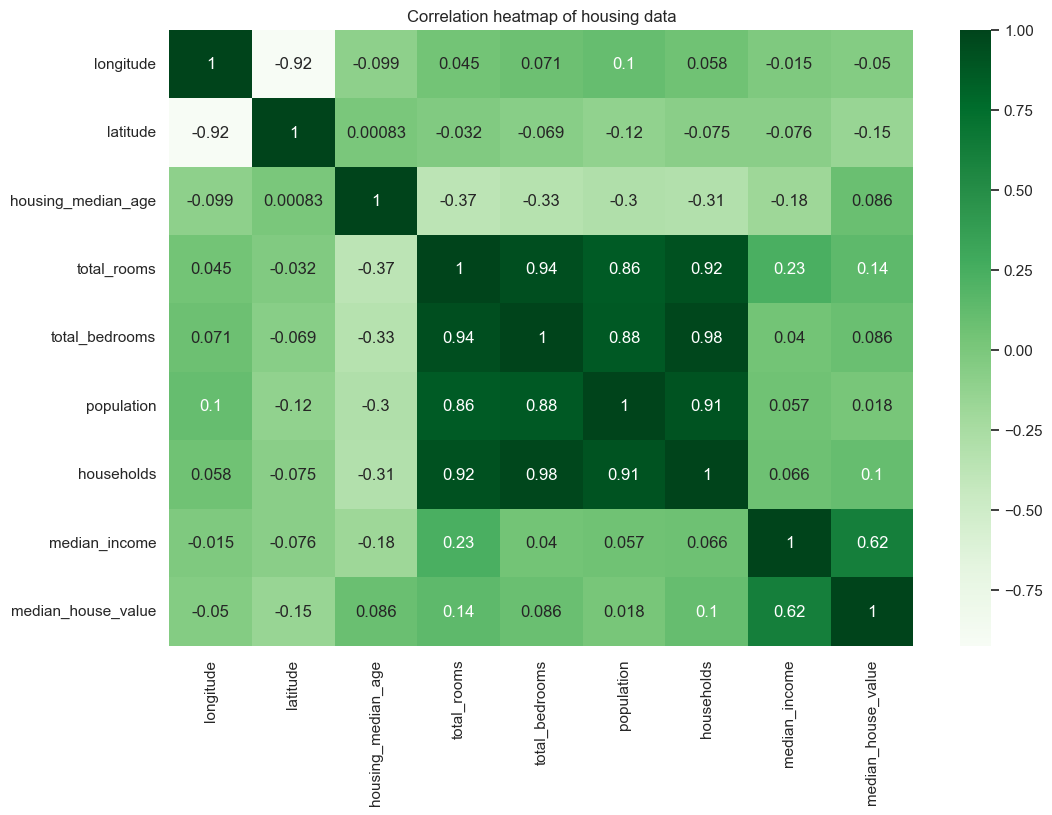

In [14]:
# Filter out non-numeric columns
df_numeric = df_no_outliers_2.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Greens')
plt.title('Correlation heatmap of housing data')
plt.show()

correlation between the two independent variable is too high, it means might potentially be dealing with multicolinerity. we do want to avoid it. heat map great way identify..

light green area low correlation with other independent variables

we can remove one of variable because they are highly correlated and they explain similar types of information,
we can identify which can remove by seeing other correlations.
see the hihest score in independent variables , total_bedrooms


In [15]:
df = df_no_outliers_2.drop('total_bedrooms', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19026 entries, 2 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19026 non-null  float64
 1   latitude            19026 non-null  float64
 2   housing_median_age  19026 non-null  float64
 3   total_rooms         19026 non-null  float64
 4   population          19026 non-null  float64
 5   households          19026 non-null  float64
 6   median_income       19026 non-null  float64
 7   median_house_value  19026 non-null  float64
 8   ocean_proximity     19026 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.5+ MB


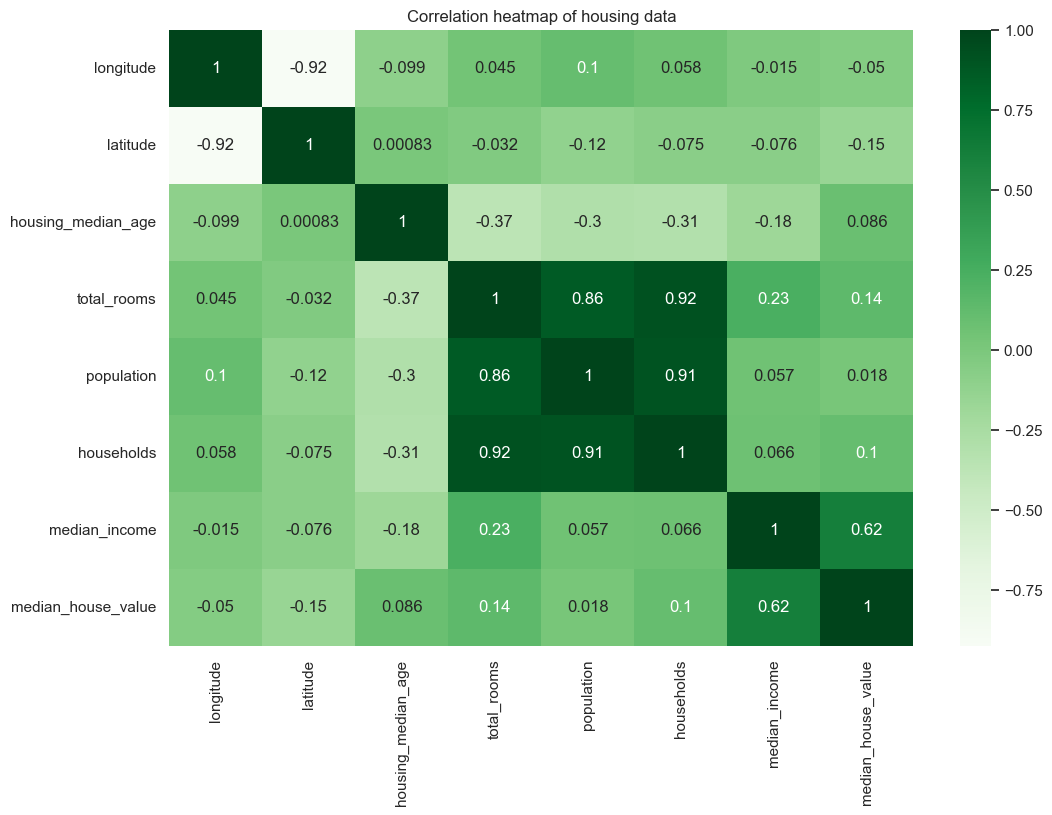

In [16]:
# Filter out non-numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Greens')
plt.title('Correlation heatmap of housing data')
plt.show()

In [ ]:
ocean_proximity_dummies = pd.get_dummies(
    df['ocean_proximity'], prefix='ocean_proximity', dtype=float)
df = pd.concat([df.drop('ocean_proximity', axis=1),
               ocean_proximity_dummies], axis=1)

In [ ]:
df.head(10)

In [ ]:
df.info()

In [ ]:
df = df.drop('ocean_proximity_ISLAND', axis=1)

In [ ]:
df.head(10)

splitting data to train and test


In [ ]:
df.columns

In [ ]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'population', 'households', 'median_income',
            'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
            'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ['median_house_value']

x = df[features]
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1111)


print(f'Training set size:, {x_train.shape[0]} samples')
print(f'Test set size:, {x_test.shape[0]} samples')
print(f'Training set size:, {y_train.shape[0]} samples')
print(f'Test set size:, {y_test.shape[0]} samples')

Training

In [ ]:
x_train_const = sm.add_constant(x_train)

model_fitted = sm.OLS(y_train, x_train_const).fit()

print(model_fitted.summary())

Preditctions/Testing

In [ ]:
x_test_const = sm.add_constant(x_test)

test_predictions = model_fitted.predict(x_test_const)

In [ ]:
print(test_predictions)

checking OLS assumptions

assumption 1: linearity

In [ ]:
plt.scatter(y_test, test_predictions, color="forestgreen")
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Observed and predicted values on test data')
plt.plot(y_test,y_test, color="darkred")
plt.show()

assumption 2 : random sample

In [ ]:
mean_residuals = np.mean(model_fitted.resid)
print(f'the mean of the residuals is {np.round(mean_residuals,2)}')

In [ ]:
plt.scatter(model_fitted.fittedvalues, model_fitted.resid,color='forestgreen')
plt.axhline(y=0, color='red',linestyle='--')
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.title('Residuaks and fitted values ')
plt.show()

assumption 3: exoeneity

In [ ]:
residuals = model_fitted.resid

for column in x_train.columns:
    corr_coefficient = np.corrcoef(x_train[column],residuals)[0,1]
    print(f'correlation betweeen residuals and {column}:{np.round(corr_coefficient,2)}')

assumtion 4: homoskedasticty

In [ ]:
plt.scatter(model_fitted.fittedvalues, model_fitted.resid,color='forestgreen')
plt.axhline(y=0, color='red',linestyle='--')
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.title('Residuaks and fitted values ')
plt.show()

training and testing linear regression model

scalind data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
print(x_test_scaled)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# create and fit the model
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

# make predictions on the scaled test data
y_pred = lr.predict(x_test_scaled)

# calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f'MSE on test set: {mse}')
print(f'RMSE on test set: {rmse}')

In [ ]:
from joblib import dump, load

# Save the model to a file
dump(lr, 'linear_regression_model.joblib')
# Load the model from the file
loaded_model = load('linear_regression_model.joblib')


In [ ]:
import pickle

# Save the model to a file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lr, file)


In [ ]:
# Load the model from the file
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [ ]:
# Make a prediction with the loaded model
y_pred = loaded_model.predict(x_test_scaled)
print(y_pred)
